In [ ]:
# CODSOFT TASK-1 TITANIC SURVIVAL PREDICTION

In [3]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Other Libraries
import pickle
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# calling the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# dimensions and datatypes
df.shape
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# check for the null values
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# checking the balance of the dataset

survival_count= df["Survived"].value_counts()
survival_rate = 100*survival_count/df.shape[1]
survival_data = pd.concat([survival_count, survival_rate], axis=1).reset_index() 
survival_data.columns=['Survived', 'Count', 'Percentage']
survival_data


,Survived,Count,Percentage
0,0,549,4575.0
1,1,342,2850.0


Text(0.5, 1.0, 'Survival Percentage Of Titanic Passengers')

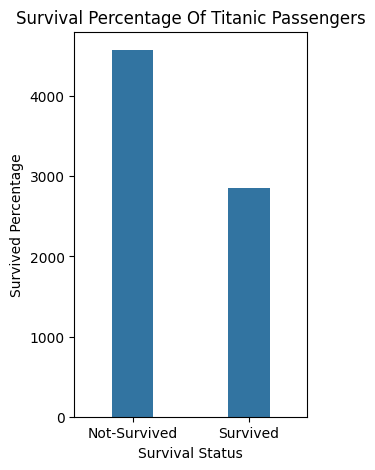

In [10]:
# plot the survival percentage 
plt.figure(figsize =(3,5))
sns.barplot(survival_data, x=['Not-Survived', 'Survived'], y= 'Percentage', width = 0.36)
plt. ylabel('Survived Percentage') 
plt. xlabel('Survival Status')
plt.title('Survival Percentage Of Titanic Passengers')

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


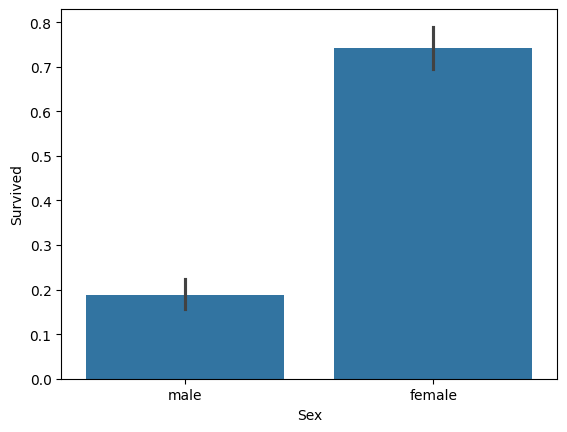

In [11]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=df)
#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

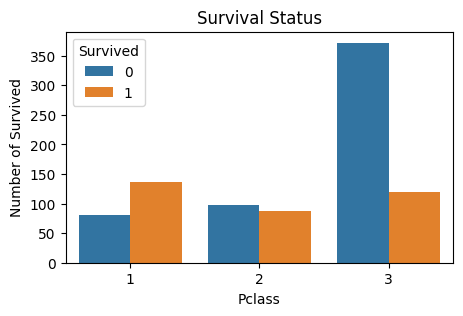

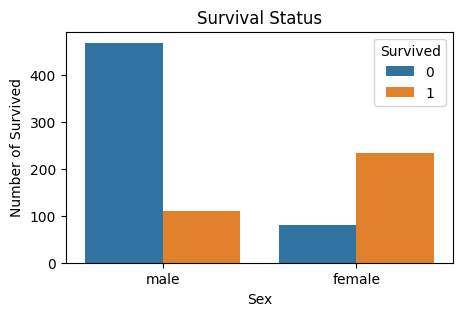

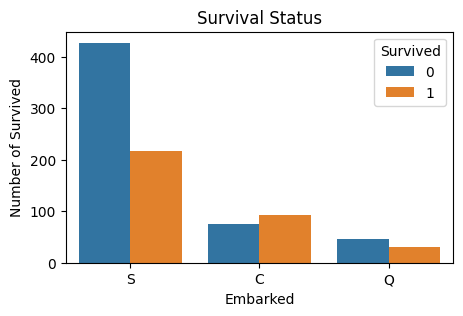

In [12]:
# function to show survival rate according to grps

def survival_acc_to_grp(df,colname): 
   plt.figure(figsize=(5,3))
   survival_by_pclass = df[['Survived', colname]].value_counts().reset_index() 
   sns.barplot(survival_by_pclass, x=colname, y='count', hue='Survived')
   plt.ylabel('Number of Survived')
   plt.title(f'Survival Status')
   
# survival among the Pclass
survival_acc_to_grp(df, 'Pclass')
# survival among the Sex 
survival_acc_to_grp(df, 'Sex')
# survival among the Embarked
survival_acc_to_grp(df, 'Embarked')

In [13]:
# function to show distribution of variables according to survival
def vars_acc_to_surv(df, colname):
   plt.figure(figsize=(3, 5))
   sns.kdeplot(df, x=colname, hue='Survived')
   plt.title(f'{colname} distribution according to the survival')

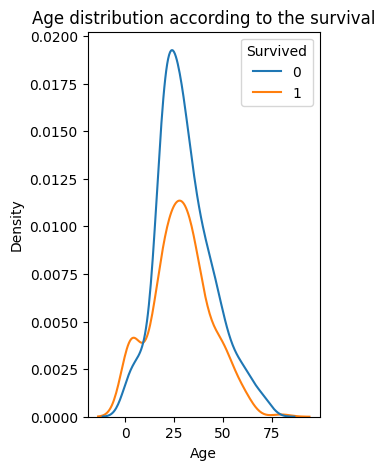

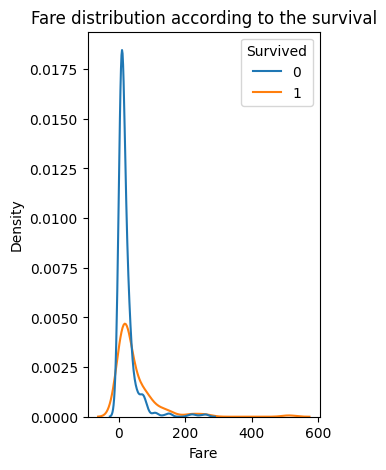

In [14]:
# age distribution according to survival status
vars_acc_to_surv(df, 'Age')
# fare distribution according to survival status
vars_acc_to_surv(df, 'Fare')

In [15]:
#function to visualise count data according to survival
def count_acc_to_surv(df, colname):
   plt.figure(figsize=(3,5))
   df1=df.groupby(['SibSp', 'Survived']).count()['PassengerId'].reset_index() 
   sns.barplot(df1, x = 'SibSp', y='PassengerId', hue='Survived')
   plt.title(f'{colname} according to survival')
   plt.xlabel(f'{colname}')
   plt.ylabel('count')

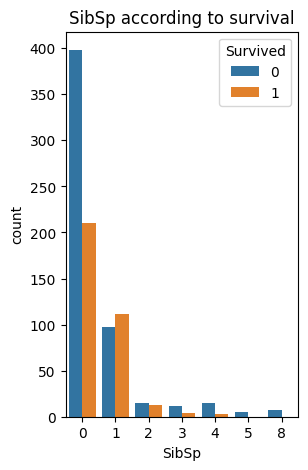

In [16]:
# SibSp distribution according to survival status
count_acc_to_surv(df, 'SibSp')

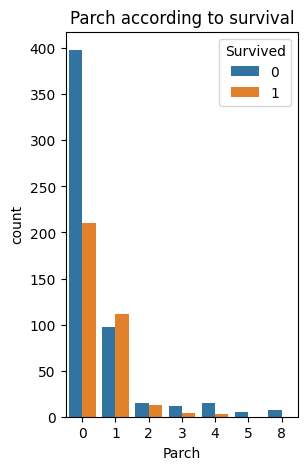

In [17]:
# Parch distribution according to survival status
count_acc_to_surv(df, 'Parch')

Text(0.5, 0, 'Continuous Variables')

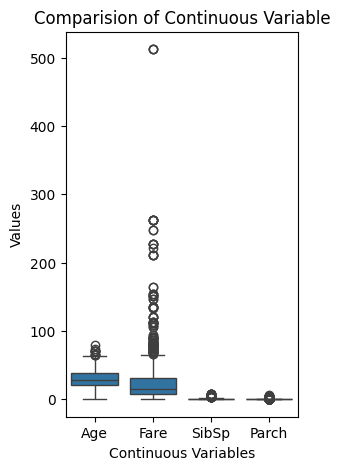

In [18]:
# variabilty and the location of the continuous variables

cont_vars = pd.melt(df, value_vars=['Age', 'Fare', 'SibSp', 'Parch'])
plt.figure(figsize=(3,5))
sns.boxplot(cont_vars, x='variable', y='value') 
plt.title('Comparision of Continuous Variable')
plt.ylabel('Values')
plt.xlabel('Continuous Variables')

In [19]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
# deleting rows that has Null values in 'Fare' Column 
df = df.dropna(subset='Fare')

In [21]:
#filling up the missing values of the Age column by the median age

df['Age'] = df['Age'].fillna(df['Age'].median())

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [23]:
# handling imbalance

df_survived = df[df['Survived']==1]
df_not_survived = df[df[ 'Survived']==0]

df_survived_resampled = df_survived.sample(n=df_not_survived.shape[0], replace=True, random_state=101)
df_balanced = pd.concat([df_not_survived, df_survived_resampled]).sample(frac=1, random_state=26)
df_balanced

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
849,1,1,female,28.0,1,0,89.1042,C
735,0,3,male,28.5,0,0,16.1000,S
857,1,1,male,51.0,0,0,26.5500,S
336,0,1,male,29.0,1,0,66.6000,S
272,1,2,female,41.0,0,1,19.5000,S
...,...,...,...,...,...,...,...,...
354,0,3,male,28.0,0,0,7.2250,C
21,1,2,male,34.0,0,0,13.0000,S
430,1,1,male,28.0,0,0,26.5500,S
244,0,3,male,30.0,0,0,7.2250,C


In [24]:
df_balanced['Survived'].value_counts()

Survived
1    549
0    549
Name: count, dtype: int64

In [25]:
# splitting in to X and y
X=df_balanced.drop(['Survived'], axis=1)
y=df_balanced['Survived']

In [26]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1055)

print(f'''
X_train: {X_train.shape}
X_test: {X_test.shape}
y_train: {y_train.shape}
y_test: {y_test.shape}''')


X_train: (878, 7)
X_test: (220, 7)
y_train: (878,)
y_test: (220,)


In [27]:
# Model Building
# preparing the model pipeline that includes
cont_cols = ['Age', 'Fare']
disc_cols = ['SibSp', 'Parch']
cat_cols = ['Pclass', 'Sex', 'Embarked']

continuous_transformer = Pipeline(steps=[('scaler', StandardScaler())])
discrete_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
   transformers=[
      ('cont', continuous_transformer, cont_cols),
      ('disc', discrete_transformer, disc_cols),
      ('cat', categorical_transformer, cat_cols)])

model = Pipeline (steps=[('preprocessor', preprocessor),
                ('classifier', LogisticRegression())])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('disc',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression())])

In [28]:
# prediction
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [29]:
# classification report

cr = classification_report(y_test, y_pred)
print(cr)



              precision    recall  f1-score   support

           0       0.67      0.87      0.76        93
           1       0.88      0.69      0.77       127

    accuracy                           0.76       220
   macro avg       0.77      0.78      0.76       220
weighted avg       0.79      0.76      0.76       220



Text(8.222222222222223, 0.5, 'Predicted Value')

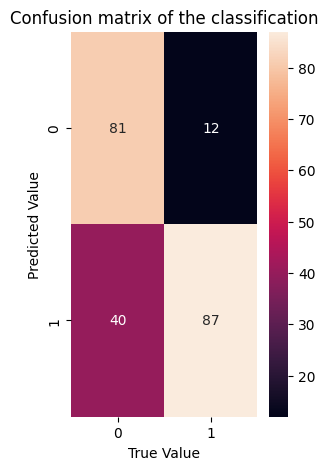

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,5)) 
sns.heatmap(cm, annot = True)
plt.title('Confusion matrix of the classification')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [31]:
model.score(X_test,y_test)

0.7636363636363637

In [32]:
predict=model.predict(X_test)
matrices=r2_score(predict,y_test)
matrices

0.04499540863177254